<div style="text-align:center">
    <h1 style="color:blue;text-shadow: 2px 2px #E0E0E0">Projeto de Análise MyAnimeList</h1>
    <a href="https://www.kaggle.com/datasets/hamzaashfaque1999/myanimelist-scraped-data/" target="_blank">MyAnimeList Anime & Manga Dataset (July 2025)</a><br>
    <a href="https://github.com/Gregory280">Autor: Gregory280</a>
</div>

<p style="text-align:center">
    <b>Notebook 1 de 2<br>
    Etapa de Pré-Processamento</b>
</p>

<h3 style="color:blue;text-shadow: 2px 2px #E0E0E0">
    Fonte de Dados
</h3>
<p>
    Conjunto de dados extraído de um banco de dados de animes e mangás conhecido como MyAnimeList.net.<br>
    Os dados extraídos são de animes e mangás disponíveis no site de até julho de 2025.<br>
    Contém dois arquivos .csv com um total de 105.983 entradas extraídas, sendo 28.635 entradas de anime e 77.348 entradas de mangá. 
</p>

<h3 style="color:blue;text-shadow: 2px 2px #E0E0E0">
    Pacotes Python
</h3>

In [1]:
!pip install -q -U watermark

In [2]:
!pip install -q missingno

In [3]:
# Pacotes utilizados
import ast
from collections import Counter
from sklearn.preprocessing import MultiLabelBinarizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [4]:
%reload_ext watermark
%watermark -a "Gregory280"

Author: Gregory280



<h3 style="color:blue;text-shadow: 2px 2px #E0E0E0">
    Carregando os Dados
</h3>

In [5]:
# Carrega o dataset de animes
df = pd.read_csv("../data/myanimelist_animes.csv")

In [6]:
# Shape
df.shape

(28635, 32)

<p>
    Temos 28635 registros de animes e 32 colunas.
</p>

In [7]:
# Define o número total de colunas para mostrar ao imprimir o dataframe
pd.set_option('display.max_columns', 100)

In [8]:
# Colunas
df.columns

Index(['id', 'link', 'title_name', 'score', 'scored_by', 'ranked',
       'popularity', 'members', 'favorited', 'synonymns', 'japanese_name',
       'english_name', 'german_name', 'french_name', 'spanish_name',
       'item_type', 'episodes', 'status', 'airing_date', 'premier_date',
       'broadcast_date', 'producers', 'licensors', 'studios', 'source',
       'genres', 'themes', 'demographic', 'duration', 'age_rating',
       'description', 'background'],
      dtype='object')

In [9]:
# Amostra
df.head(3)

,id,link,title_name,score,scored_by,ranked,popularity,members,favorited,synonymns,japanese_name,english_name,german_name,french_name,spanish_name,item_type,episodes,status,airing_date,premier_date,broadcast_date,producers,licensors,studios,source,genres,themes,demographic,duration,age_rating,description,background
0,52991,https://myanimelist.net/anime/52991/Sousou_no_...,Sousou no Frieren,9.30,696616,1.0,137,1171400,72555,"Frieren at the Funeral, Frieren The Slayer",葬送のフリーレン,Frieren: Beyond Journey's End,NaN,NaN,NaN,TV,28,Finished Airing,"Sep 29, 2023 to Mar 22, 2024",Fall 2023,Fridays at 23:00 (JST),"[""Aniplex"", ""Dentsu"", ""Shogakukan-Shueisha Pro...","[""Crunchyroll""]","[""Madhouse""]",Manga,"[""Adventure"", ""Drama"", ""Fantasy""]",[],Shounen,24 min. per ep.,PG-13 - Teens 13 or older,During their decade-long quest to defeat the D...,Sousou no Frieren was released on Blu-ray and ...
1,5114,https://myanimelist.net/anime/5114/Fullmetal_A...,Fullmetal Alchemist: Brotherhood,9.10,2232236,2.0,3,3547700,234996,"Hagane no Renkinjutsushi: Fullmetal Alchemist,...",鋼の錬金術師 FULLMETAL ALCHEMIST,Fullmetal Alchemist: Brotherhood,NaN,Fullmetal Alchemist Brotherhood,NaN,TV,64,Finished Airing,"Apr 5, 2009 to Jul 4, 2010",Spring 2009,Sundays at 17:00 (JST),"[""Aniplex"", ""Square Enix"", ""Mainichi Broadcast...","[""Funimation"", ""Aniplex of America""]","[""Bones""]",Manga,"[""Action"", ""Adventure"", ""Drama"", ""Fantasy""]","[""Military""]",Shounen,24 min. per ep.,R - 17+ (violence & profanity),After a horrific alchemy experiment goes wrong...,NaN
2,9253,https://myanimelist.net/anime/9253/Steins_Gate,Steins;Gate,9.07,1472818,3.0,14,2716426,196912,NaN,STEINS;GATE,Steins;Gate,NaN,NaN,NaN,TV,24,Finished Airing,"Apr 6, 2011 to Sep 14, 2011",Spring 2011,Wednesdays at 02:05 (JST),"[""Frontier Works"", ""Media Factory"", ""Kadokawa ...","[""Funimation""]","[""White Fox""]",Visual novel,"[""Drama"", ""Sci-Fi"", ""Suspense""]","[""Psychological"", ""Time Travel""]",NaN,24 min. per ep.,PG-13 - Teens 13 or older,Eccentric scientist Rintarou Okabe has a never...,Steins;Gate is based on 5pb. and Nitroplus' vi...


In [10]:
# Retorna informações sobre as colunas do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28635 entries, 0 to 28634
Data columns (total 32 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              28635 non-null  int64  
 1   link            28635 non-null  object 
 2   title_name      28635 non-null  object 
 3   score           18673 non-null  float64
 4   scored_by       28635 non-null  int64  
 5   ranked          21857 non-null  float64
 6   popularity      28635 non-null  int64  
 7   members         28635 non-null  int64  
 8   favorited       28635 non-null  int64  
 9   synonymns       14159 non-null  object 
 10  japanese_name   28517 non-null  object 
 11  english_name    12313 non-null  object 
 12  german_name     2002 non-null   object 
 13  french_name     2177 non-null   object 
 14  spanish_name    2055 non-null   object 
 15  item_type       28635 non-null  object 
 16  episodes        28635 non-null  object 
 17  status          28635 non-null 

<p>
    Com o número de de valores não-nulos da coluna <i>id</i> podemos ter noção quais colunas tem muitos valores nulos.<br>
    Há colunas com menos da metade de valores não-nulos. Vamos remove-lás.
</p>

<h3 style="color:blue;text-shadow: 2px 2px #E0E0E0">
    Etapa de Pré-Processamento
</h3>
<p>
    Nesta etapa vamos aplicada vamos verificar e tratar problemas no dataset como valores ausentes, duplicatas e valores negativos.
</p>

In [11]:
# Criamos uma série de valores booleanos indicando duplicatas presentes
duplicatas = df.duplicated()

In [12]:
# Exibe as linhas duplicadas encontradas
df[duplicatas]

,id,link,title_name,score,scored_by,ranked,popularity,members,favorited,synonymns,japanese_name,english_name,german_name,french_name,spanish_name,item_type,episodes,status,airing_date,premier_date,broadcast_date,producers,licensors,studios,source,genres,themes,demographic,duration,age_rating,description,background


<p>
    Com isso temos certeza que não há linhas duplicadas no dataset.
</p>

<h4 style="color:blue;text-shadow: 2px 2px #E0E0E0">
    Valores Negativos
</h4>
<p>
    Vamos verificar se existem valores negativos na colunas numéricas que supostamente não deveriam ter valores negativos.
</p>

In [13]:
# Verificar valores negativos na coluna score
df[df['score'] < 0]

,id,link,title_name,score,scored_by,ranked,popularity,members,favorited,synonymns,japanese_name,english_name,german_name,french_name,spanish_name,item_type,episodes,status,airing_date,premier_date,broadcast_date,producers,licensors,studios,source,genres,themes,demographic,duration,age_rating,description,background


In [14]:
# Verificar valores negativos na coluna scored_by
df[df['scored_by'] < 0]

,id,link,title_name,score,scored_by,ranked,popularity,members,favorited,synonymns,japanese_name,english_name,german_name,french_name,spanish_name,item_type,episodes,status,airing_date,premier_date,broadcast_date,producers,licensors,studios,source,genres,themes,demographic,duration,age_rating,description,background


In [15]:
# Verificar valores negativos na coluna ranked
df[df['ranked'] < 0]

,id,link,title_name,score,scored_by,ranked,popularity,members,favorited,synonymns,japanese_name,english_name,german_name,french_name,spanish_name,item_type,episodes,status,airing_date,premier_date,broadcast_date,producers,licensors,studios,source,genres,themes,demographic,duration,age_rating,description,background


In [16]:
# Verificar valores negativos na coluna popularity
df[df['popularity'] < 0]

,id,link,title_name,score,scored_by,ranked,popularity,members,favorited,synonymns,japanese_name,english_name,german_name,french_name,spanish_name,item_type,episodes,status,airing_date,premier_date,broadcast_date,producers,licensors,studios,source,genres,themes,demographic,duration,age_rating,description,background


In [17]:
# Verificar valores negativos na coluna members
df[df['members'] < 0]

,id,link,title_name,score,scored_by,ranked,popularity,members,favorited,synonymns,japanese_name,english_name,german_name,french_name,spanish_name,item_type,episodes,status,airing_date,premier_date,broadcast_date,producers,licensors,studios,source,genres,themes,demographic,duration,age_rating,description,background


In [18]:
# Verificar valores negativos na coluna favorited
df[df['favorited'] < 0]

,id,link,title_name,score,scored_by,ranked,popularity,members,favorited,synonymns,japanese_name,english_name,german_name,french_name,spanish_name,item_type,episodes,status,airing_date,premier_date,broadcast_date,producers,licensors,studios,source,genres,themes,demographic,duration,age_rating,description,background


<p>
    Com isso temos certeza que não há valores negativos errôneos no dataset.
</p>

<h4 style="color:blue;text-shadow: 2px 2px #E0E0E0">
    Valores Ausentes
</h4>
<p>
    Vamos visualizar os valores ausentes das colunas.
</p>

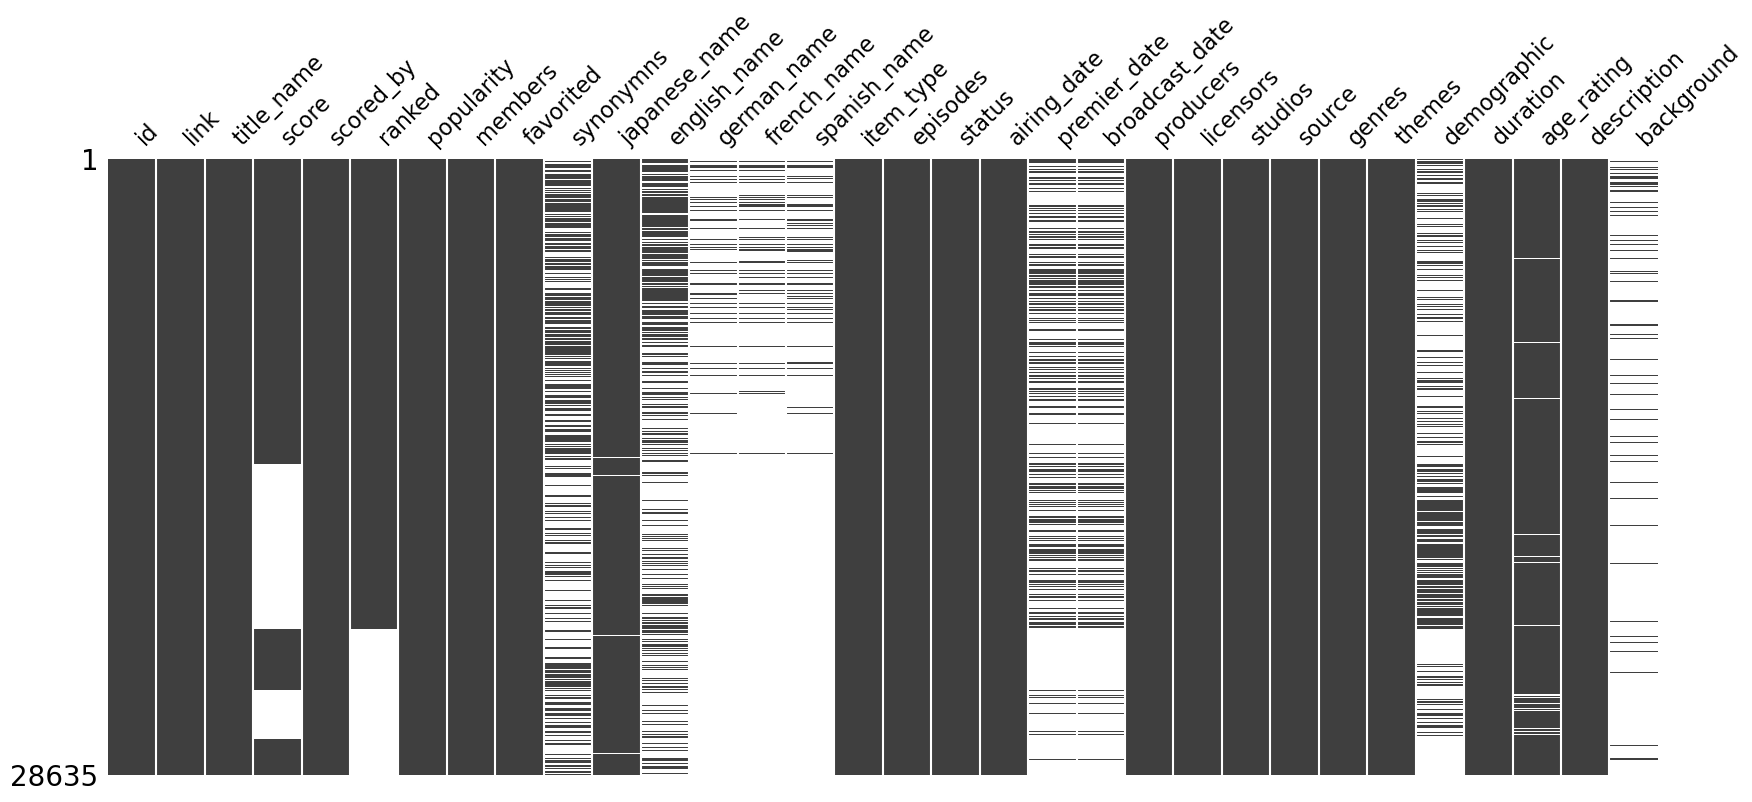

In [19]:
# Mapa de valores ausentes
msno.matrix(df, figsize = (20, 8), sparkline = False)
plt.show()

<p>
    Há muitas colunas com valores nulos.<br>
    Vamos calcular os valores nulos.
</p>

In [20]:
# Função que calcula o percentual de valores ausentes
def calc_valores_ausentes(df):
    totalCells = np.prod(df.shape)
    missingCount = df.isnull().sum()
    totalMissing = missingCount.sum()
    print("O dataset tem", round(((totalMissing/totalCells) * 100), 2), "%", "de valores ausentes.")

In [21]:
calc_valores_ausentes(df)

O dataset tem 23.17 % de valores ausentes.


In [22]:
# Função para calcular os valores ausentes por coluna
def calc_valores_ausentes_por_coluna(df):
    total_valores_ausentes = df.isnull().sum()
    porcentagem_valores_ausentes = 100 * total_valores_ausentes / len(df)
    dtype_valores_ausentes = df.dtypes
    tabela = pd.concat([total_valores_ausentes, porcentagem_valores_ausentes, dtype_valores_ausentes], axis=1)
    tabela_renomeada= tabela.rename(columns = {0: 'Valores Ausentes', 1 : '%', 2: 'Dtype'})
    tabela_renomeada = tabela_renomeada[tabela_renomeada.iloc[:,0] != 0].sort_values('%', ascending = False).round(2)
    print(
        "O dataset possui tem " + str(df.shape[1]) + " colunas.\n"
        "Encontrado: " + str(tabela_renomeada.shape[0]) + " colunas que têm valores ausentes"
         )
    if tabela_renomeada.shape[0] == 0:
        return
    return tabela_renomeada

In [23]:
# Cria a tabela com valores ausentes
df_valores_ausentes = calc_valores_ausentes_por_coluna(df)

O dataset possui tem 32 colunas.
Encontrado: 14 colunas que têm valores ausentes


In [24]:
# Visualizamos a tabela de valores ausentes
df_valores_ausentes

,Valores Ausentes,%,Dtype
german_name,26633,93.01,object
spanish_name,26580,92.82,object
french_name,26458,92.40,object
background,25749,89.92,object
premier_date,20308,70.92,object
broadcast_date,20308,70.92,object
demographic,17985,62.81,object
english_name,16322,57.00,object
synonymns,14476,50.55,object
score,9962,34.79,float64


<p>
    Colunas com mais de 50% de valores nulos serão descartadas.
</p>

In [25]:
# Colunas que serão removidas
colunas_para_remover = df_valores_ausentes[df_valores_ausentes['%'] >= 50].index.tolist()

In [26]:
colunas_para_remover

['german_name',
 'spanish_name',
 'french_name',
 'background',
 'premier_date',
 'broadcast_date',
 'demographic',
 'english_name',
 'synonymns']

<p>
     Apenas a coluna <i>demographic</i> será mantida apesar do número elevado de valores ausentes, pois ainda serão importantes para as análises.
</p>

In [27]:
# Reservando colunas expecíficas
colunas_para_remover = [col for col in colunas_para_remover if col not in ['demographic']]

In [28]:
colunas_para_remover

['german_name',
 'spanish_name',
 'french_name',
 'background',
 'premier_date',
 'broadcast_date',
 'english_name',
 'synonymns']

<p>
    A coluna a respeito da demografia não está mais inclusa na lista para remoção.
</p>

<h4 style="color:blue;text-shadow: 2px 2px #E0E0E0">
    Removendo Colunas
</h4>
<p>
    As colunas <i>licensors</i>, <i>producers</i> e <i>description</i> não são importantes para o objetivo, portante iremos remove-lás também junto das colunas que separamos para remover.
</p>

In [29]:
# Realizando o drop de colunas e criando um novo dataframe
df_limpo = df.drop(colunas_para_remover, axis = 1)

In [30]:
df_limpo = df_limpo.drop("licensors", axis=1)

In [31]:
df_limpo = df_limpo.drop("producers", axis=1)

In [32]:
df_limpo = df_limpo.drop("description", axis=1)

In [33]:
df_limpo.shape

(28635, 21)

In [34]:
calc_valores_ausentes(df_limpo)

O dataset tem 5.89 % de valores ausentes.


<p>
    Diminuimos o dataset de 32 colunas para 22.<br>
    Diminuimos a porcentagem de valores nulos do dataset de 23% para apenas 5%.
</p>

In [35]:
calc_valores_ausentes_por_coluna(df_limpo)

O dataset possui tem 21 colunas.
Encontrado: 5 colunas que têm valores ausentes


,Valores Ausentes,%,Dtype
demographic,17985,62.81,object
score,9962,34.79,float64
ranked,6778,23.67,float64
age_rating,587,2.05,object
japanese_name,118,0.41,object


<p>
    De 14 colunas com valores ausentes, temos agora somente 5.
</p>

<p>
    <i>Score</i> é uma variável subjetiva, baseada na opinião do público, portanto não daria para tratar os valores ausentes sem distorcer a realidade e afetar análises estatísticas e de correlações. O mesmo vale para a variável <i>ranked</i>.
</p>

<h4 style="color:blue;text-shadow: 2px 2px #E0E0E0">
    Tratamento dos Valores Ausentes
</h4>
<p>
    Vamos começar atribuindo o valor <i>Unknown</i> (Desconhecido) para os valores ausentes de nossas variáveis qualitativas.
</p>

In [36]:
# Pega somente as coluna do tipo object com valores ausentes
colunas_object = df_limpo.select_dtypes(include="object").columns[df_limpo.select_dtypes(include="object").isna().any()].tolist()

In [37]:
colunas_object

['japanese_name', 'demographic', 'age_rating']

In [38]:
# Preenche os valores ausentes com Unkown
df_limpo[colunas_object] = df_limpo[colunas_object].fillna("Unknown")

In [39]:
calc_valores_ausentes_por_coluna(df_limpo)

O dataset possui tem 21 colunas.
Encontrado: 2 colunas que têm valores ausentes


,Valores Ausentes,%,Dtype
score,9962,34.79,float64
ranked,6778,23.67,float64


<p>
    Os valores de <i>score</i> e <i>ranked</i> não serão modificados, pois a ausência de valores deles representa informação. São animes que não tiveram votos suficientes para calcular sua avaliação. Poderiamos criar uma nova coluna e atribuir aos valores ausentes a nota 0, tendo em mente que 0 representa estes animes são score suficiente e não score 0 de fato por ser ruim.
</p>
<p>
    Vamos visualizar o mapa de valores ausentes novamente.
</p>

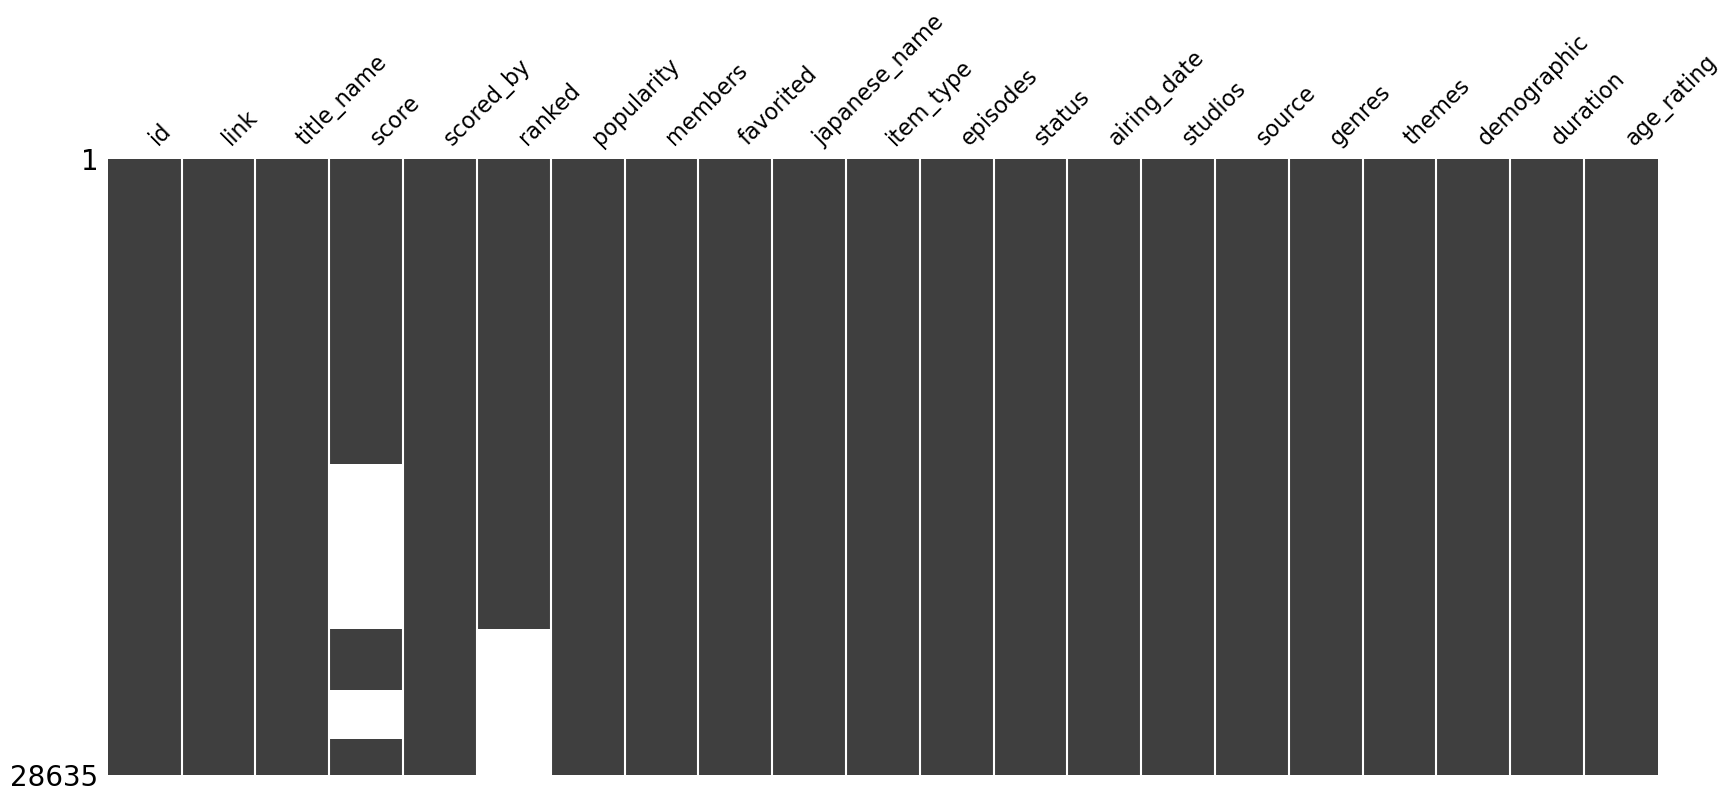

In [40]:
msno.matrix(df_limpo, figsize = (20, 8), sparkline = False)
plt.show()

<h4 style="color:blue;text-shadow: 2px 2px #E0E0E0">
    Categorizando Variáveis
</h4>
<p>
    Algumas colunas numéricas como scored_by (que representam a quantidade de pessoas que deram nota para o anime) e members (quantidade de membros) são muito específicas para trabalhar.<br>
    Para enriquecer o trabalho de análise irei criar faixas de valores para representar estas informações.
</p>

In [41]:
# Definimos as faixas/grupos para a variável scored_by
bins = [0, 1_000, 5_000, 10_000, 50_000, 75_000, 100_000, 200_000, 500_000, 1_000_000, np.inf]
labels = ["Até 1.000", "Até 5.000", "Até 10.000", "Até 50.000", "Até 75.000", "Até 100.000",
          "Até 200.000", "Até 500.000", "Até 1.000.000", "Mais de 1.000.000"]

In [42]:
# Adicionamos uma nova coluna com base nas nossas faixas
df_limpo['scored_by_faixa'] = pd.cut(df_limpo['scored_by'], bins=bins, labels=labels, include_lowest=True)

<p>
    Temos o problema que agora os animes com <i>scored_by</i> 0 (sem pessoas que deram nota) está dentro da faixa de <i>Até 1.000</i>. 
    Irei criar uma nova categoria para colocar estes valores 0.
</p>

In [43]:
# Adiciona uma nova faixa
df_limpo['scored_by_faixa'] = df_limpo['scored_by_faixa'].cat.add_categories('0')
df_limpo.loc[df_limpo['scored_by'] == 0, 'scored_by_faixa'] = '0'

<p>
    Irei fazer o mesmo com a coluna de members.
</p>

In [44]:
bins = [0, 500, 1_000, 3_000, 5_000, 10_000, 20_000, 50_000, 100_000, 500_000, 1_000_000, np.inf]
labels = ['0-500', '500-1.000', '1.000-3.000', '3.000-5.000', '5.000-10.000', '10.000-20.000', '20.000-50.000', '50.000-100.000', 
    '100.000-500.000', '500.000-1.000.000', 'mais de 1.000.000']

In [45]:
df_limpo['members_faixa'] = pd.cut(df_limpo['members'], bins=bins, labels=labels, right=False)

<h4 style="color:blue;text-shadow: 2px 2px #E0E0E0">
    Formatando Colunas
</h4>
<p>
    As colunas <i>studios</i>, <i>genres</i> e <i>themes</i> não possuem apenas um valor. São listas de valores em string.
    Vamos transformar estes dados em listas de fato para pode trabalhar com eles.
</p>

In [46]:
# Exemplo
studios_18689 = df.query('id == 18689')['studios'].values[0]
print(type(studios_18689))

<class 'str'>


In [47]:
# Exemplo
studios_list_18689 = ast.literal_eval(studios_18689)
print(type(studios_list_18689))

<class 'list'>


<p>
    Agora irei aplicar a mesma lógica para as colunas alvos.
</p>

In [48]:
df_limpo['studios'] = df_limpo['studios'].apply(lambda x: ast.literal_eval(x))

In [49]:
df_limpo['genres'] = df_limpo['genres'].apply(lambda x: ast.literal_eval(x))

In [50]:
df_limpo['themes'] = df_limpo['themes'].apply(lambda x: ast.literal_eval(x))

In [51]:
print(type(df_limpo['themes'][0]))

<class 'list'>


<p>
    Agora nossas listas são de fato listas.
</p>

<p>
    Vou transformar a coluna de <i>episodes</i> em numeric e ignorar os valores que não dá pra converter.
</p>

In [52]:
df_limpo['episodes'] = pd.to_numeric(df_limpo['episodes'], errors='coerce')

<p>
    É do meu interesse criar uma coluna com o ano que cada anime lançou para fazer análises em cima disso posteriormente.
</p>

In [53]:
# Pega o primeiro ano das strings
df_limpo['start_year'] = (df_limpo['airing_date'].str.extract(r'(\d{4})'))

In [62]:
df_limpo['start_year'] = pd.to_numeric(df_limpo['start_year'])

<h4 style="color:blue;text-shadow: 2px 2px #E0E0E0">
    Fim
</h4>
<p>
    Vou salvar o dataset tratado. Se abrir o dataset limpo em outro notebook, teremos que aplicar novamente as transformações de tipo nos dados. Para evitar isso iremos utilizar a mágica do Jupyter e transferir nossa variável df_limpo para o próximo notebook. Assim não precisamos repetir nenhum processo.
</p>

In [56]:
# Salva a variável df_limpo
%store df_limpo

Stored 'df_limpo' (DataFrame)


In [57]:
df_limpo.to_csv('../data/myanimelist_animes_limpo.csv', index=False, encoding='utf-8')

In [58]:
df_limpo.head(3)

,id,link,title_name,score,scored_by,ranked,popularity,members,favorited,japanese_name,item_type,episodes,status,airing_date,studios,source,genres,themes,demographic,duration,age_rating,scored_by_faixa,members_faixa,start_year
0,52991,https://myanimelist.net/anime/52991/Sousou_no_...,Sousou no Frieren,9.30,696616,1.0,137,1171400,72555,葬送のフリーレン,TV,28.0,Finished Airing,"Sep 29, 2023 to Mar 22, 2024",[Madhouse],Manga,"[Adventure, Drama, Fantasy]",[],Shounen,24 min. per ep.,PG-13 - Teens 13 or older,Até 1.000.000,mais de 1.000.000,2023.0
1,5114,https://myanimelist.net/anime/5114/Fullmetal_A...,Fullmetal Alchemist: Brotherhood,9.10,2232236,2.0,3,3547700,234996,鋼の錬金術師 FULLMETAL ALCHEMIST,TV,64.0,Finished Airing,"Apr 5, 2009 to Jul 4, 2010",[Bones],Manga,"[Action, Adventure, Drama, Fantasy]",[Military],Shounen,24 min. per ep.,R - 17+ (violence & profanity),Mais de 1.000.000,mais de 1.000.000,2009.0
2,9253,https://myanimelist.net/anime/9253/Steins_Gate,Steins;Gate,9.07,1472818,3.0,14,2716426,196912,STEINS;GATE,TV,24.0,Finished Airing,"Apr 6, 2011 to Sep 14, 2011",[White Fox],Visual novel,"[Drama, Sci-Fi, Suspense]","[Psychological, Time Travel]",Unknown,24 min. per ep.,PG-13 - Teens 13 or older,Mais de 1.000.000,mais de 1.000.000,2011.0


In [59]:
%watermark -a "Gregory280"

Author: Gregory280



In [60]:
%watermark --iversions

missingno : 0.5.2
numpy     : 2.1.3
pandas    : 2.2.3
sklearn   : 1.6.1
seaborn   : 0.13.2
matplotlib: 3.10.0

